<a href="https://colab.research.google.com/github/AI-ML-DL-EXPERT/Handwritten-Digit-Classifier-using-ANN/blob/main/Handwritten_Digit_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

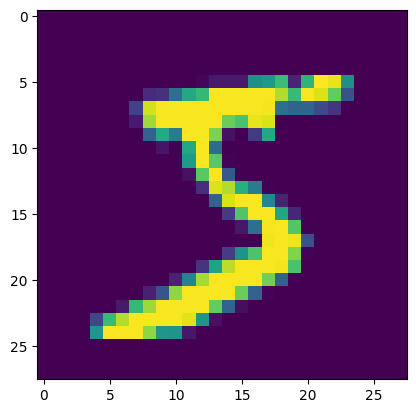

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [7]:
# Scale the values

x_train = x_train/ 255
x_test = x_test/ 255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "Softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="Adam", metrics = ["accuracy"])

In [12]:
history = model.fit(x_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 22s 12ms/step - loss: 0.2515 - accuracy: 0.9264 - val_loss: 0.1394 - val_accuracy: 0.9585
Epoch 2/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.1231 - val_accuracy: 0.9648
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0734 - accuracy: 0.9763 - val_loss: 0.1002 - val_accuracy: 0.9700
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.1057 - val_accuracy: 0.9707
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0447 - accuracy: 0.9850 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.1061 - val_accuracy: 0.9745
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.1012 - val_accura

In [13]:
y_prob = model.predict(x_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[4.59245284e-22, 5.57148494e-17, 1.06845985e-17, ...,
        9.99999940e-01, 7.11934708e-19, 1.71399592e-12],
       [9.95073316e-21, 8.58004293e-11, 9.99999940e-01, ...,
        2.47082323e-17, 1.09987548e-20, 5.31207073e-32],
       [1.26643229e-07, 9.99999344e-01, 1.12552100e-10, ...,
        2.01456700e-08, 3.17626530e-07, 5.84965951e-15],
       ...,
       [2.99840695e-27, 2.80734864e-25, 6.93841854e-35, ...,
        2.39926680e-24, 2.68565007e-22, 7.37159274e-17],
       [2.00616844e-25, 1.66478523e-24, 4.58095859e-29, ...,
        6.92501262e-20, 1.61727677e-14, 4.39967726e-26],
       [6.54246604e-24, 4.96790211e-28, 5.68027247e-23, ...,
        5.51393682e-38, 4.36428093e-15, 5.13313113e-29]], dtype=float32)

In [14]:
y_pred = y_prob.argmax(axis = 1)

In [15]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9791

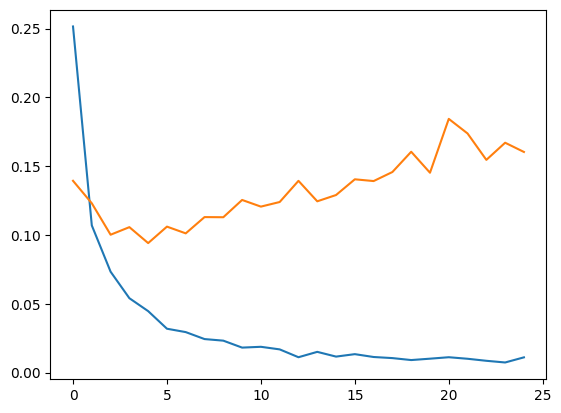

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

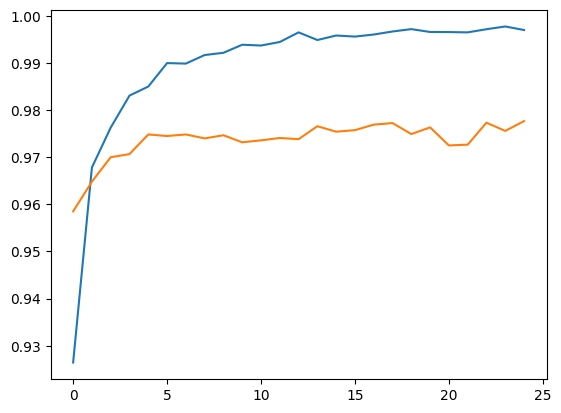

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

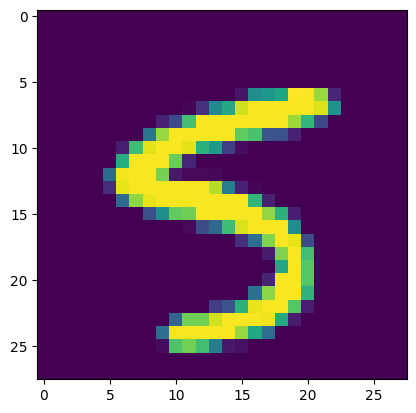

In [19]:
plt.imshow(x_test[1221])

In [21]:
model.predict(x_test[1221].reshape(1, 28, 28)).argmax(axis = 1)[0]

1/1 [==============================] - 0s 173ms/step


5